In [4]:
import tensorflow as tf

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [2]:
file = open("preprocessed_data.pkl", 'rb')
df =pd.read_pickle(file)

In [3]:
df

,Membrane_File,Array,count,class_y,tax_percent_y,shannon_y
0,25_A_0_0_0_NOTEbetacrop__cell_mask.tif,"[[5.081872676893776e-08, 4.8460704058174135e-0...",1037,Actinobacteria,84.190809,0.612171
1,25_A_0_0_0_NOTEbetacrop__cell_mask.tif,"[[2.393376562270774e-10, 2.2821606319656274e-1...",1146,Actinobacteria,84.190809,0.612171
2,25_A_0_0_0_NOTEbetacrop__cell_mask.tif,"[[2.54735757976638e-08, 2.365368518778207e-08,...",1084,Actinobacteria,84.190809,0.612171
3,25_A_0_0_0_NOTEbetacrop__cell_mask.tif,"[[1.4798096117908975e-08, 1.3649336389485242e-...",984,Actinobacteria,84.190809,0.612171
4,25_A_0_0_0_NOTEbetacrop__cell_mask.tif,"[[1.923769215792163e-08, 1.783248310583817e-08...",998,Actinobacteria,84.190809,0.612171
...,...,...,...,...,...,...
445,1_C_0_0_0_NOTEbetacrop__cell_mask.tif,"[[1.6660200937233115e-07, 1.5330284203104835e-...",1462,Bacilli,59.734766,0.920380
446,1_C_0_0_0_NOTEbetacrop__cell_mask.tif,"[[1.714680357669114e-07, 1.5447716442959433e-0...",2410,Bacilli,59.734766,0.920380
447,1_C_0_0_0_NOTEbetacrop__cell_mask.tif,"[[1.600410274475345e-06, 1.536875237196635e-06...",436,Bacilli,59.734766,0.920380
448,1_C_0_0_0_NOTEbetacrop__cell_mask.tif,"[[1.4973179505061335e-07, 1.4227925409700885e-...",677,Bacilli,59.734766,0.920380


In [5]:
class_dict = {"Bacilli": 2,
              "Actinobacteria":0,
              "Alphaproteobacteria": 1,
              "Gammaproteobacteria": 3}

In [6]:
pd.unique(df["class_y"])

array(['Actinobacteria', 'Alphaproteobacteria', 'Bacilli',
       'Gammaproteobacteria'], dtype=object)

In [7]:
df["class_label"] = df.apply(lambda x: class_dict[x["class_y"]],axis = 1)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(200, 200, 1)),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(1)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dense (Dense)               (None, 256)               10240256  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 1

In [50]:
cnn_tax_model = models.Sequential()
cnn_tax_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
cnn_tax_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn_tax_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_tax_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn_tax_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_tax_model.add(layers.Flatten())
cnn_tax_model.add(layers.Dense(64, activation='relu'))
cnn_tax_model.add(layers.Dense(1))

In [51]:
cnn_tax_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 flatten_6 (Flatten)         (None, 135424)           

In [23]:
cnn_model = models.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(4))

In [24]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 135424)           

In [15]:
arrays = df["Array"]
target = df["shannon_y"]
classes = df["class_label"]

In [16]:
dataset = []
for i in arrays:
    temp = i[:,:]
    norm = (temp-np.min(temp))/(np.max(temp)-np.min(temp))
    dataset.append(norm)

In [17]:
dataset = tf.expand_dims(tf.convert_to_tensor(dataset),axis = -1).numpy()

In [18]:
dataset.shape

(420, 200, 200, 1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(dataset, 
                                                    target, 
                                                    random_state = 0,
                                                    test_size=0.3)

In [20]:
model.compile(optimizer='adam',
              loss="mse",
             metrics =["mse"])

history = model.fit(X_train, y_train, epochs=100, batch_size = 10,
                    validation_data=(X_test, y_test))

Epoch 1/100
30/30 [==============================] - 1s 37ms/step - loss: 0.3804 - mse: 0.3804 - val_loss: 0.1598 - val_mse: 0.1598
Epoch 2/100
30/30 [==============================] - 1s 32ms/step - loss: 0.1517 - mse: 0.1517 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 3/100
30/30 [==============================] - 1s 34ms/step - loss: 0.1665 - mse: 0.1665 - val_loss: 0.1717 - val_mse: 0.1717
Epoch 4/100
30/30 [==============================] - 1s 32ms/step - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1372 - val_mse: 0.1372
Epoch 5/100
30/30 [==============================] - 1s 33ms/step - loss: 0.1152 - mse: 0.1152 - val_loss: 0.1237 - val_mse: 0.1237
Epoch 6/100
30/30 [==============================] - 1s 33ms/step - loss: 0.0999 - mse: 0.0999 - val_loss: 0.0735 - val_mse: 0.0735
Epoch 7/100
30/30 [==============================] - 1s 34ms/step - loss: 0.0827 - mse: 0.0827 - val_loss: 0.1347 - val_mse: 0.1347
Epoch 8/100
30/30 [==============================] - 1s 34ms/step - loss: 0.

In [53]:
cnn_tax_model.compile(optimizer='adam',
              loss="mse",
             metrics =["mse"])

cnn_tax_history = cnn_tax_model.fit(X_train, y_train, epochs=3, batch_size = 10,
                    validation_data=(X_test, y_test))

Epoch 1/3
30/30 [==============================] - 7s 211ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0402 - val_mse: 0.0402
Epoch 2/3
30/30 [==============================] - 6s 207ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 3/3
30/30 [==============================] - 6s 210ms/step - loss: 0.0233 - mse: 0.0233 - val_loss: 0.0372 - val_mse: 0.0372


In [19]:
y_pred_train = model.predict(X_train)

10/10 [==============================] - 0s 26ms/step


In [20]:
y_pred_test = model.predict(X_test)

4/4 [==============================] - 0s 16ms/step


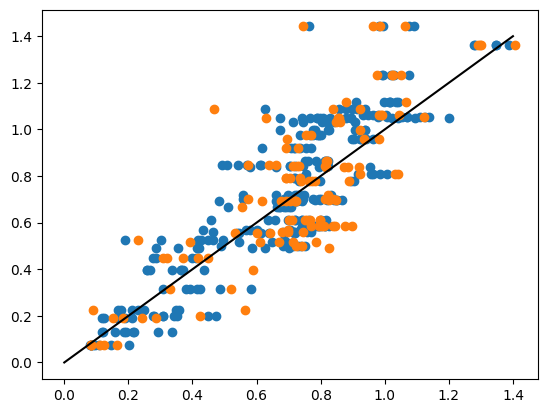

In [24]:
plt.scatter(y_pred_train.transpose()[0],y_train)
plt.scatter(y_pred_test.transpose()[0],y_test)
plt.plot([0,1.4],[0,1.4],color = "black")


In [55]:
y_pred_train_cnn = cnn_tax_model.predict(X_train)

10/10 [==============================] - 1s 103ms/step


In [56]:
y_pred_test_cnn = cnn_tax_model.predict(X_test)

4/4 [==============================] - 0s 107ms/step


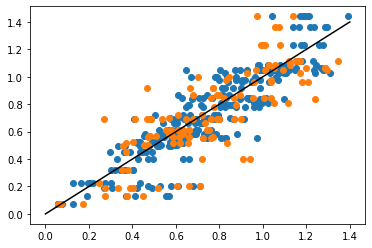

In [57]:
plt.scatter(y_pred_train_cnn.transpose()[0],y_train)
plt.scatter(y_pred_test_cnn.transpose()[0],y_test)
plt.plot([0,1.4],[0,1.4],color = "black")

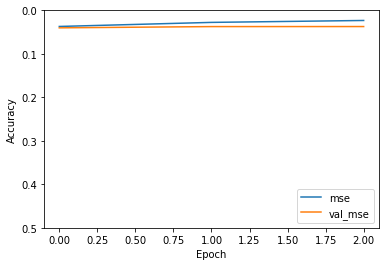

In [54]:
plt.plot(cnn_tax_history.history['mse'], label='mse')
plt.plot(cnn_tax_history.history['val_mse'], label = 'val_mse')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 0])
plt.legend(loc='lower right')


In [58]:
cnn_model.save("saved_model/cnn_class_model")

INFO:tensorflow:Assets written to: saved_model/cnn_class_model\assets


INFO:tensorflow:Assets written to: saved_model/cnn_class_model\assets


In [34]:
model_class = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(200, 200, 1)),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(4)
])

In [35]:
model_class.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 40000)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               10240256  
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 4)                

In [21]:
X_train, X_test, y_train, y_test = train_test_split(dataset, 
                                                    classes, 
                                                    test_size=0.3)

In [42]:
model_class.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_class = model_class.fit(X_train, y_train, epochs=100, batch_size = 10,
                    validation_data=(X_test, y_test))

Epoch 1/100
30/30 [==============================] - 1s 32ms/step - loss: 1.3754 - accuracy: 0.4320 - val_loss: 1.3498 - val_accuracy: 0.4841
Epoch 2/100
30/30 [==============================] - 1s 25ms/step - loss: 1.3239 - accuracy: 0.4558 - val_loss: 1.2526 - val_accuracy: 0.4841
Epoch 3/100
30/30 [==============================] - 1s 25ms/step - loss: 1.2365 - accuracy: 0.4558 - val_loss: 1.1832 - val_accuracy: 0.4841
Epoch 4/100
30/30 [==============================] - 1s 25ms/step - loss: 1.1762 - accuracy: 0.4558 - val_loss: 1.1500 - val_accuracy: 0.4841
Epoch 5/100
30/30 [==============================] - 1s 26ms/step - loss: 1.1339 - accuracy: 0.4558 - val_loss: 1.1209 - val_accuracy: 0.4841
Epoch 6/100
30/30 [==============================] - 1s 26ms/step - loss: 1.0946 - accuracy: 0.4592 - val_loss: 1.0703 - val_accuracy: 0.4921
Epoch 7/100
30/30 [==============================] - 1s 26ms/step - loss: 1.0251 - accuracy: 0.5816 - val_loss: 1.0202 - val_accuracy: 0.5952
Epoch 

In [25]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

cnn_history = cnn_model.fit(X_train, y_train, epochs=50, batch_size = 10,
                    validation_data=(X_test, y_test))

Epoch 1/50
30/30 [==============================] - 7s 209ms/step - loss: 1.0249 - accuracy: 0.5578 - val_loss: 0.6903 - val_accuracy: 0.6905
Epoch 2/50
30/30 [==============================] - 6s 205ms/step - loss: 0.6447 - accuracy: 0.7687 - val_loss: 0.5256 - val_accuracy: 0.7937
Epoch 3/50
30/30 [==============================] - 6s 206ms/step - loss: 0.5122 - accuracy: 0.7993 - val_loss: 0.5003 - val_accuracy: 0.7540
Epoch 4/50
30/30 [==============================] - 6s 206ms/step - loss: 0.4756 - accuracy: 0.8027 - val_loss: 0.5055 - val_accuracy: 0.8095
Epoch 5/50
30/30 [==============================] - 6s 204ms/step - loss: 0.4794 - accuracy: 0.8129 - val_loss: 0.5164 - val_accuracy: 0.7698
Epoch 6/50
30/30 [==============================] - 6s 206ms/step - loss: 0.4436 - accuracy: 0.8197 - val_loss: 0.3954 - val_accuracy: 0.8254
Epoch 7/50
30/30 [==============================] - 6s 210ms/step - loss: 0.3584 - accuracy: 0.8537 - val_loss: 0.4297 - val_accuracy: 0.8571
Epoch 

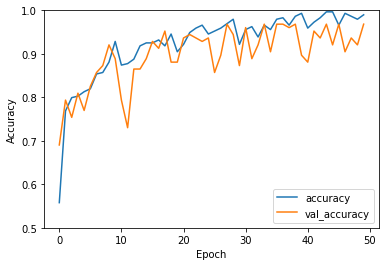

In [31]:
plt.plot(cnn_history.history['accuracy'], label='accuracy')
plt.plot(cnn_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [27]:
y_train_pred = cnn_model.predict(X_train)
y_train_classes = y_train_pred.argmax(axis = -1)
cm_train = tf.math.confusion_matrix(y_train,y_train_classes, num_classes = 4)

10/10 [==============================] - 1s 100ms/step


In [28]:
y_prediction = cnn_model.predict(X_test)
y_classes = y_prediction.argmax(axis=-1)
cm=tf.math.confusion_matrix(y_test,y_classes, num_classes = 4)

4/4 [==============================] - 0s 109ms/step


Text(0.5, 24.0, 'Predicted')

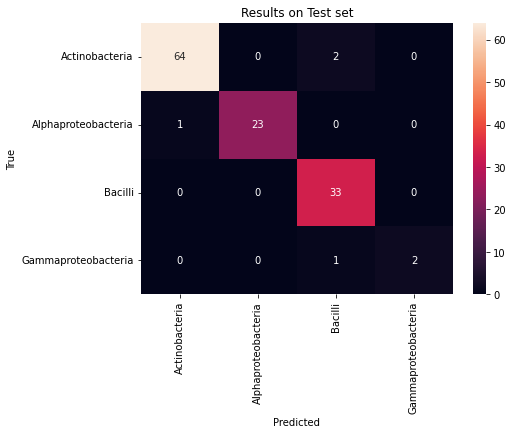

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm, annot = True, xticklabels = ['Actinobacteria', 'Alphaproteobacteria', 'Bacilli','Gammaproteobacteria'], yticklabels = ['Actinobacteria', 'Alphaproteobacteria', 'Bacilli', 'Gammaproteobacteria'])
ax.set_title("Results on Test set")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")


Text(0.5, 24.0, 'Predicted')

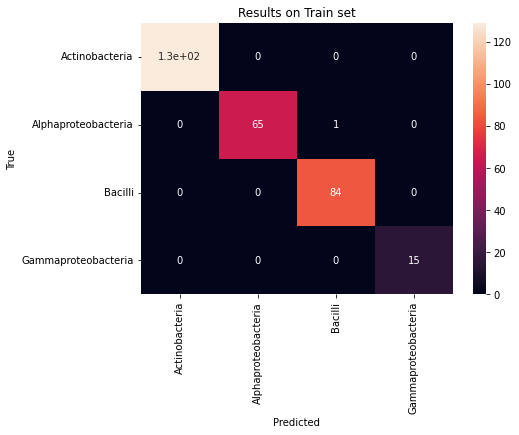

In [30]:
fig, ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_train, annot = True, xticklabels = ['Actinobacteria', 'Alphaproteobacteria', 'Bacilli','Gammaproteobacteria'], yticklabels = ['Actinobacteria', 'Alphaproteobacteria', 'Bacilli', 'Gammaproteobacteria'])
ax.set_title("Results on Train set")
ax.set_ylabel("True")
ax.set_xlabel("Predicted")

In [54]:
model_class.save("saved_model/class_model")

INFO:tensorflow:Assets written to: saved_model/class_model\assets
